<h2><center>Week 2 - Assignment</center></h2>
<h3><center>Programming for Data Science 2024</center></h3>

Exercises for the topics covered in the second lecture.

**Important**: You will need sounddevice, numpy, scipy and matplotlib. To install these, run *pip install sounddevice numpy scipy matplotlib* in the terminal, or *!pip install sounddevice numpy scipy matplotlib* in Jupyter. You will also need the data in the *data* folder.

The exercise will be marked as passed if you get **at least 10/15** points.

Exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing one .py or .ipynb file with all exercises. The name of both the .zip and the .py/.ipynb file must be *SurnameName* of the two members of the group. Example: Riccardo Cusinato + Athina Tzovara = *CusinatoRiccardo_TzovaraAthina.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For questions contact: *riccardo.cusinato@unibe.ch* with the subject: *Programming for Data Science 2024*.

**Deadline: 14:00, March 7, 2024.**

<h3 style="text-align:left;">Exercise 1 - Audio signal<span style="float: right">5 points</span></h3>

In this exercise you'll work with continuous audio signals. First we load and plot the audio signals:

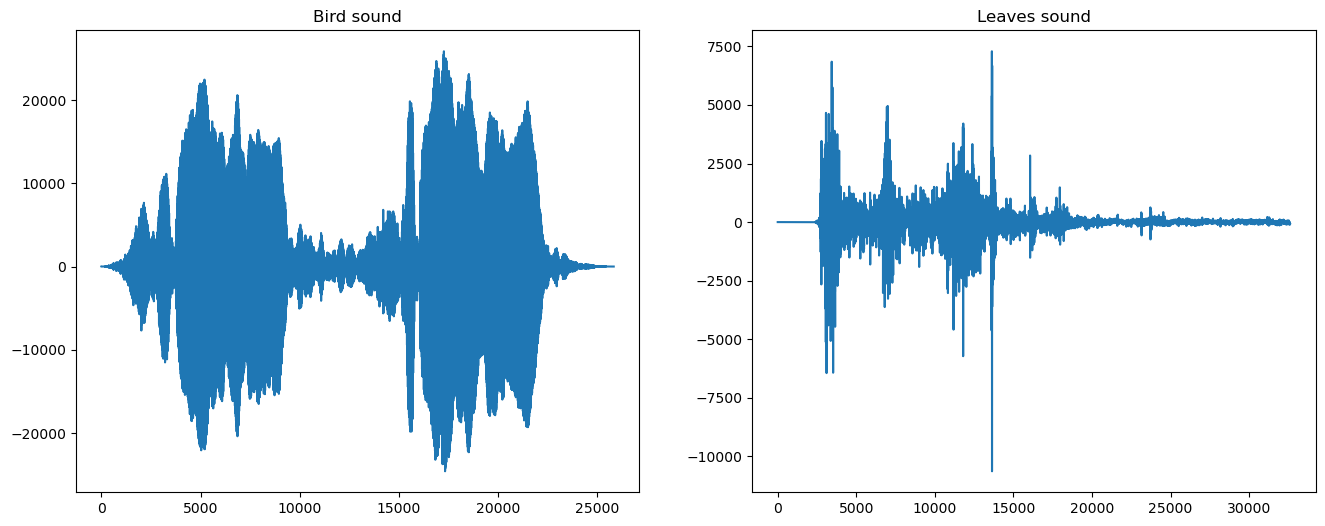

In [17]:
# Import dependencies
import time
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import read

#loading the audio signals
fs_bird, sound_bird = read('./data/bird.wav') 
fs_leaves, sound_leaves = read('./data/leaves.wav')

# Plot sounds in different subplots
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(sound_bird)
plt.title("Bird sound")
plt.subplot(1, 2, 2)
plt.plot(sound_leaves)
plt.title("Leaves sound")
plt.show()

# Play sounds
time.sleep(2)
sd.play(sound_bird, fs_bird)
time.sleep(2)
sd.play(sound_leaves, fs_leaves)
time.sleep(2)

1. Double the amplitude of the second audio signal (leaves) using *numpy*. Then plot the amplified signal using *matplotlib*. (*1 point*)

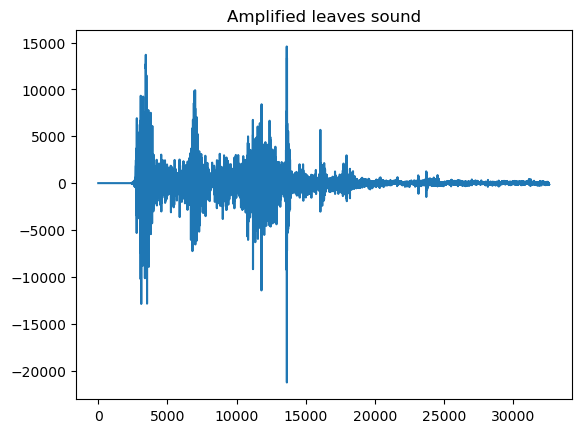

In [11]:
import numpy as np
# double the amplitude
amplified_sound_leaves = np.multiply(sound_leaves, 2)
# plot
plt.plot(amplified_sound_leaves)
plt.title("Amplified leaves sound")
plt.show()

2. The two sounds don't have the same length (number of samples). Print the length of the two sounds and create a new leaves sound as long as the birds sound. Print again the lenghts to make sure they match. (Use the amplified leaves sound previously created). (*1 point*)

In [7]:
print(f"Length of Bird sound: {sound_bird.size} \nLength of the amplified leaves sound: {amplified_sound_leaves.size}")
# remove the end of the sound 
short_amplified_sound_leaves = amplified_sound_leaves[:25824]
print(f"Now they are the same length: {sound_bird.size} (bird) = {short_amplified_sound_leaves.size} (leaves)")


Length of Bird sound: 25824 
Length of the amplified leaves sound: 32612
Now they are the same length: 25824 (bird) = 25824 (leaves)


3. Create a silence period (0 amplitude) of the same duration of the two sounds, using *numpy*. (*1 point*)

In [10]:
silence_period = np.zeros(sound_bird.size)
#checking if they are of the same duration
print(short_amplified_sound_leaves.size == silence_period.size)

True


4. Finally, concatenate the diffent sounds into one. The order should be: silence, birds, silence, leaves, silence (use the amplified and cut leaves sound). Use *numpy* and plot the results. (*2 points*)

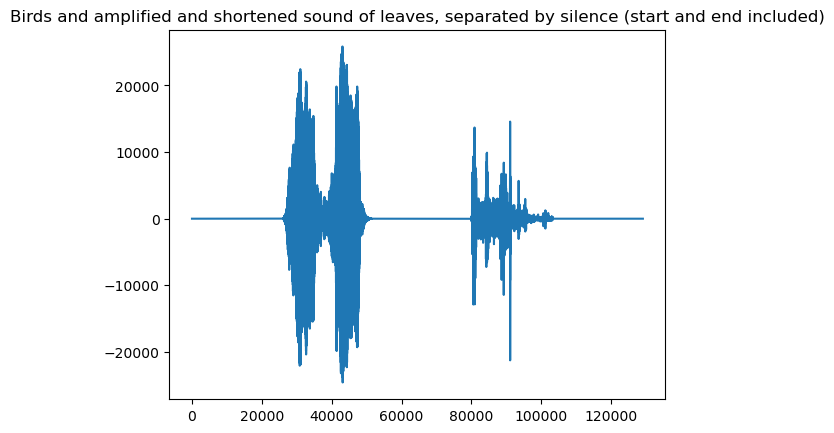

In [19]:
concatenate_sounds = np.concatenate([silence_period, sound_bird, silence_period, short_amplified_sound_leaves, silence_period])
#ploting the various element, we can 
plt.plot(concatenate_sounds)
plt.title("Birds and amplified and shortened sound of leaves, separated by silence (start and end included)")
plt.show()

#verifying the concatenation in an audio signals
sd.play(concatenate_sounds) ###warning the amplitude of the sound_bird has been increased so the audio signal is very loud and saturated


<h3 style="text-align:left;">Exercise 2 - Image data<span style="float: right">7 points</span></h3>

In this exercise, you'll work with an image, i.e. an n-dimensional matrix data. First, we load and plot the image:

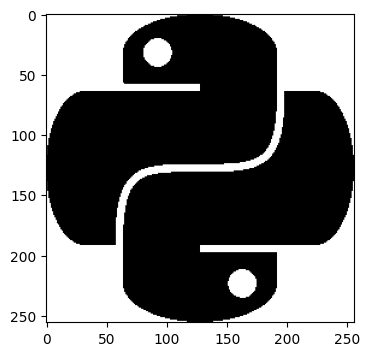

In [5]:
import matplotlib.pyplot as plt
import numpy as np

im = plt.imread('./data/python.bmp')
im = np.array(im)

plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()

The image is a 3-dimensional array, where the 1st and 2nd dimensions represent positions on the Y (rows) and X (columns) axes and the 3rd saturation values between 0 and 255 for that specific position, as [red, green, blue].

1. Set the pixels on the 50th to 60th row and and 200th to 210th column to green, and displays the resultant image. The data-type of the array should be an 8-bit unsigned integer. (*1 point*)

**NB!** 
- From the 50th row, up to and including the 60th; From the 200th column, up to and including the 210th.
- Keep in mind that the first dimension is related to the usual Y axis, and the second dimension to the usual X axis.

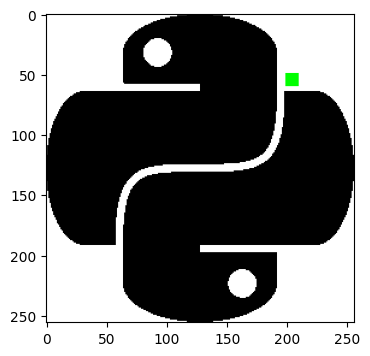

In [6]:
#the 50th row starts at the n-1 position so, it's the 49th element of the first dimension
#same to go up to the 60th row, we need to go to (n-1)+1 with the python indexing
# i.e the 60th row

#same process with the columns (second attribute of the image array)
#it would be im[49:60, 199:210]

#to have green we need to assigne the RGB value to 0 except the G --> to 255 [0,255,0]

im[0,0] #one cell is compound of the RGB value [0-255 for Red, 0-255 for Green, and 0-255 for Blue]
im[49:60, 199:210] #having 11 rows including 50 up to 60 included as well

#setting the green color to thoses rows (Y-axis) and columns (X-axis)
im[49:60, 199:210]=[0,255,0]

#verifying by plotting the modified image
plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()

2. The image created in point 1 will be the one you use in the rest of the exercise. Make a copy of the top half of the image, flip it along the 2nd axis using the appropriate numpy method, and plot the result. (*1 point*)

(128, 256, 3)


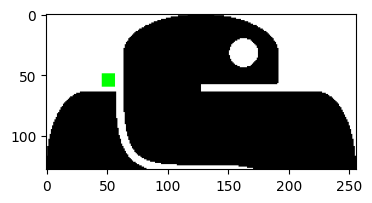

In [7]:
#the top half of the image is the first n/2 rows i.e im.shape[0]/2 (we want an integer value)
#so we use the entire division with the operator //
half_rows=im.shape[0]//2

#to copy a numpy array we saw in class the method .copy
top_half_copy=np.copy(im[:half_rows, :]) #no need to put half_rows+1 bc we start at 0 so we include one more line
#checking the shape of the copy
print(top_half_copy.shape) #128 is 256/2 so we are good for now

#to flip along an axis we can use the method .flip by the numpy module np.flip(image, axis=None)
#the first axis is 0 and the second is 1, so we have to set the axis=1
#reminder : the second axis is the X axis, so it will flip the image horizontally
top_half_flipped=np.flip(top_half_copy, axis=1)

#checking the result by plotting the top_half_flipped image
plt.figure(figsize=(4, 4))
plt.imshow(top_half_flipped)
plt.show()

3. Make a copy of the bottom half of your image, combine it together with the first half you flipped in point 2, and display the result. Also plot your original image and check whether it has changed. (*1 point*)

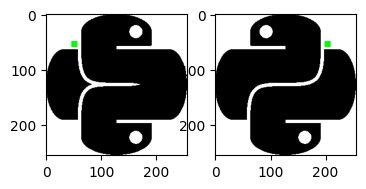

In [11]:
#to combine the two halfes, we can use the .concatenate method
#but first we need to create a copy of the second half part of the image
second_half=np.copy(im[half_rows:, :]) #starting at the postion 128 (as before we stopped at 128-1)

#concatenation of the two half part of the image
half_flipped_half_normal=np.concatenate([top_half_flipped, second_half])

#verifying by plotting the new combined image
plt.figure(figsize=(4, 4))
plt.subplot(1,2,1)
plt.imshow(half_flipped_half_normal)

#plotting the original image
plt.subplot(1,2,2)
plt.imshow(im)
plt.show()

4. Make a shallow copy (view) of the top half of your image. Change every black pixel ([0, 0, 0]) to a green pixel ([0, 255, 0]). Plot the resulting colored top part, together with the base of your shallow copy and also the original image. (*2 points*)

**Hint**: to test that a consition holds for multiple elements use the *numpy.all* function.

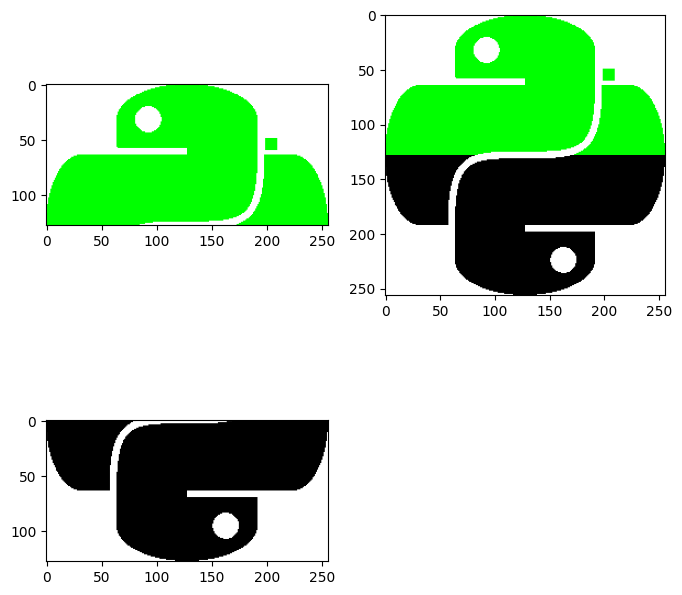

In [30]:
#creating the shallow copy
top_half_shallow_copy=im[:half_rows, :] #we don't need the im.view method to have a shallow copy

#changing every black pixel to green
#we first need to check for all the pixel that are black [0,0,0] using a conditional
#np.all(image, axis=None, ...) test all array elements are set to True
# top_half_shallow_copy==[0,0,0] set to True or False the pixel with Black or Not Black colors
# we need to use the method .all as the tip says with the axis set to 2 for the color dimension (0,1 are for Y and X axis)
# we just need to implement these two last with the shallow copy i.e top_half_shallow_copy
# and set it to green pixel [0,255,0]
top_half_shallow_copy[(top_half_shallow_copy==[0,0,0]).all(axis=2)]=[0,255,0]

###plotting the different parts together
plt.figure(figsize=(8, 8)) #we are making the dimensions as a factor of 4*2 to divide it equally, to use the .subplot method then
#shallow copy first
plt.subplot(2,2,1)
plt.imshow(top_half_shallow_copy)

#base of the copy
plt.subplot(2,2,3) #second part
plt.imshow(im[half_rows:, :])
#these two subplots make a total of 4 units out of the 8, the last would be the 4 last units alltogether

#the whole original image
plt.subplot(2,2,2)
plt.imshow(im)
plt.show()


###Questions for the assistant, I've been struggling quite a lot with the .subplot method
###I don't know how to share it equally, I tried to explain it with the comment above but I don't think I really understood
### Furthermore, it would be nicer to not plot the axis for the 2 first subplots and to "stick" them together
### But I still don't know how to do it, I hope it would be enough for the exercices tho...

5. In point 3, your original image should not have changed, while in point 4, the original image should show the same change as when plotting the base of your shallow copy. Give a brief explanation of why the original image changed in one instance, and not in the other. (*2 points*)

In [13]:
### Here it would only be comment to answer the questions

### Answer :
# In the point 3, the original image didn't change because we created a copy of the original array
# Indeed, it's like slicing a Python list, the new object is a completely new copy of the first object
# Then if we modify the copy, the original object would not be impacted

# Compare to shallow copies, they are based on the same original array
# So the difference here is that if we modifiy a shallow copy, the original array will also be modified
# That's why when we plot the original array, the first half is green
# It comes by the fact that we switched all the black pixel to green on a shallow copy of the first half original array
# Result the first half part of the original image is also changed !

<h3 style="text-align:left;">Exercise 3 - Tabular data<span style="float: right">3 points</span></h3>

In the following you'll work with tabular data, i.e. data related to multiple observations. The dataset consists of synthetic data on monthly average precipitations in 4 different countries: Switzerland, Italy, France and Germany. Let's first load the dataset and assign the variables:

In [106]:
import numpy as np

precip = np.load("./data/precip.npy", allow_pickle=True)

precip[:, 0]  # 12 data points for Switzerland (one per month)
precip[:, 1]  # 12 data points for Italy (one per month)
precip[:, 2]  # 12 data points for France (one per month)
precip[:, 3]  # 12 data points for Germany (one per month)
precip

array([[0.7 , 0.4 , 0.51, 1.19],
       [0.75, 0.48, 0.52, 1.23],
       [1.85, 1.57, 1.63, 2.37],
       [2.93, 2.56, 2.69, 3.37],
       [3.05, 2.47, 2.89, 3.55],
       [2.02, 1.59, 1.75, 2.5 ],
       [1.93, 1.58, 1.75, 2.36],
       [1.62, 1.36, 1.41, 2.17],
       [1.84, 1.53, 1.65, 2.38],
       [1.31, 1.  , 1.11, 1.78],
       [1.39, 1.12, 1.21, 1.79],
       [0.84, 0.54, 0.66, 1.24]])

1. Use built-in numpy methods to obtain an array with the maximum precipitation for each country, and the average precipitation *across* the five countries for each month. (*1 point*)

In [107]:
# maximum for each country ( = along axis 0)
max_precip = np.max(precip, axis = 0)
# mean for each month ( = along axis 1)
mean_precip = np.mean(precip, axis = 1)
#checking the results
print(f"The maximums are : {max_precip} and the averages are : {mean_precip}")

The maximums are : [3.05 2.56 2.89 3.55] and the averages are : [0.7    0.745  1.855  2.8875 2.99   1.965  1.905  1.64   1.85   1.3
 1.3775 0.82  ]


2. Obtain the maximum precipitation of the entire dataset. Next, use a numpy method to find out at which row and column in the dataset you would find this maximum precipitation at. (*2 points*)

In [109]:
# maximum value
max_all_precip = np.max(precip)
# index
position=np.where(precip == max_all_precip) # .where method find the position of the value i.e. row 4, col 3
#checking both values are the same
print(position, precip[4,3] == max_all_precip)

(array([4], dtype=int64), array([3], dtype=int64)) True
